In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

## Loading Data:

In [2]:
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target.shape

(1797,)

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
img = list(zip(digits.images, digits.target))

In [8]:
img[100]

(array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
        [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
        [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
        [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
        [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
        [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]]),
 4)

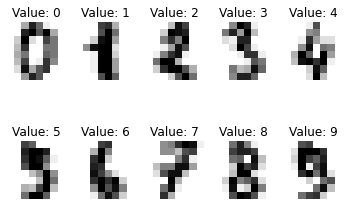

In [9]:
for i, (image, label) in enumerate(img[:10]):
    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Value: %i' % label)  

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=2018)

In [11]:
sc = StandardScaler()

In [12]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
svm_clf = SVC(kernel='rbf',gamma=0.001, C=1)
knn_clf = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=2018)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000,
                         learning_rate=0.1, random_state=2018)
mlp = MLPClassifier(activation='logistic', solver='sgd',learning_rate_init=0.001,
                    learning_rate='constant', alpha=1e-4,hidden_layer_sizes=(100,),
                    max_iter=5000, shuffle=True, random_state=2018)

In [14]:
svm_clf.fit(X_train_std, y_train)
knn_clf.fit(X_train_std, y_train)
ada.fit(X_train_std, y_train)
mlp.fit(X_train_std, y_train)

MLPClassifier(activation='logistic', max_iter=5000, random_state=2018,
              solver='sgd')

In [15]:
svm_pred = svm_clf.predict(X_test_std)
knn_pred = knn_clf.predict(X_test_std)
ada_pred = ada.predict(X_test_std)
mlp_pred = mlp.predict(X_test_std)

## Performing Metrics:

In [16]:
print("Accuracy score SVM:", accuracy_score(y_test, svm_pred))
print("Accuracy score KNN:", accuracy_score(y_test, knn_pred))
print("Accuracy score AdaBoost:", accuracy_score(y_test, ada_pred))
print("Accuracy score MLP:", accuracy_score(y_test, mlp_pred))

Accuracy score SVM: 0.9425925925925925
Accuracy score KNN: 0.975925925925926
Accuracy score AdaBoost: 0.9277777777777778
Accuracy score MLP: 0.95


## Evaluation of Multilayer Perceptron Model

In [17]:
print("Confusion matrix:\n%s" % (confusion_matrix(y_test, mlp_pred)))

Confusion matrix:
[[50  0  0  0  0  0  0  0  0  0]
 [ 0 51  0  0  1  0  0  0  2  3]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  3 55  0  1  0  0  2  0]
 [ 0  0  0  0 48  0  0  0  1  0]
 [ 0  1  0  0  0 47  1  0  0  1]
 [ 0  0  0  0  0  0 60  0  0  0]
 [ 0  0  0  0  1  0  0 50  0  1]
 [ 0  4  0  0  0  0  1  0 46  0]
 [ 0  0  0  0  0  1  0  1  2 54]]


In [18]:
print("Classification report:\n%s\n" % (classification_report(y_test, mlp_pred)))

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.91      0.89      0.90        57
           2       0.95      1.00      0.97        52
           3       1.00      0.90      0.95        61
           4       0.96      0.98      0.97        49
           5       0.96      0.94      0.95        50
           6       0.97      1.00      0.98        60
           7       0.98      0.96      0.97        52
           8       0.87      0.90      0.88        51
           9       0.92      0.93      0.92        58

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540




In [19]:
X_test[:1]

array([[ 0.,  0.,  5., 14., 10.,  7.,  0.,  0.,  0.,  0., 16., 16., 16.,
        16.,  3.,  0.,  0.,  3., 16., 10.,  2., 16.,  7.,  0.,  0.,  7.,
        16.,  3.,  0., 12.,  8.,  0.,  0.,  8., 16.,  1.,  0., 12.,  8.,
         0.,  0.,  7., 16.,  5.,  2., 16.,  4.,  0.,  0.,  2., 16., 15.,
        14., 13.,  0.,  0.,  0.,  0.,  7., 15., 13.,  2.,  0.,  0.]])

In [20]:
X_test[:1].reshape(-1, 8, 8)

array([[[ 0.,  0.,  5., 14., 10.,  7.,  0.,  0.],
        [ 0.,  0., 16., 16., 16., 16.,  3.,  0.],
        [ 0.,  3., 16., 10.,  2., 16.,  7.,  0.],
        [ 0.,  7., 16.,  3.,  0., 12.,  8.,  0.],
        [ 0.,  8., 16.,  1.,  0., 12.,  8.,  0.],
        [ 0.,  7., 16.,  5.,  2., 16.,  4.,  0.],
        [ 0.,  2., 16., 15., 14., 13.,  0.,  0.],
        [ 0.,  0.,  7., 15., 13.,  2.,  0.,  0.]]])

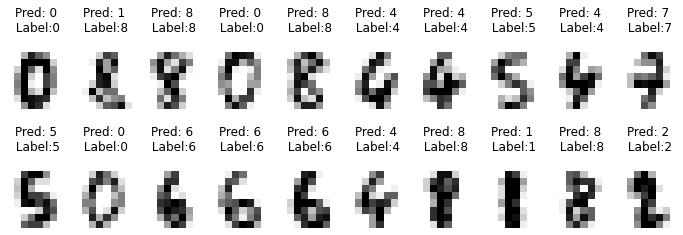

In [21]:
plt.figure(figsize=(12,4))
img_pred = list(zip(X_test.reshape(-1,8,8), mlp_pred, y_test))
for index, (image, prediction, label) in enumerate(img_pred[:20]):
    plt.subplot(2, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Pred: {}\n Label:{}\n'.format(prediction,label))

In [22]:
misclassifiedIndexes = []
for idx, (label, predict) in enumerate(list(zip(y_test, mlp_pred))):
    if label != predict: 
        misclassifiedIndexes.append(idx)
misclassifiedIndexes

[1,
 24,
 33,
 86,
 104,
 120,
 122,
 212,
 253,
 267,
 290,
 327,
 336,
 340,
 343,
 349,
 350,
 358,
 424,
 427,
 454,
 463,
 469,
 482,
 502,
 532,
 539]

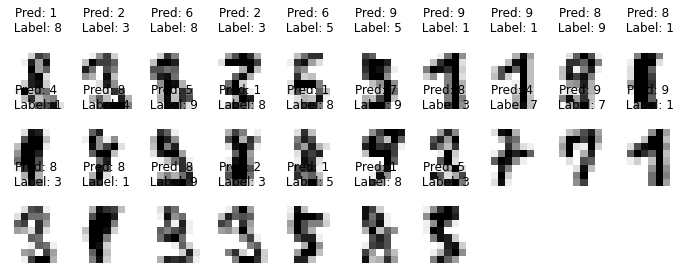

In [23]:
plt.figure(figsize=(12,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes):
    plt.subplot(3, 10, plotIndex + 1)
    plt.axis('off')
    plt.imshow(img_pred[badIndex][0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Pred: {}\n Label: {}\n".format(mlp_pred[badIndex], y_test[badIndex]))